## 今天的範例-常見偵測異常值的方法


### 範例資料
鐵達尼號 train 資料集


In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
df_train = pd.read_csv("Titanic_train.csv")

### 探索性分析:
*  觀察-是否有異常值  
我們來觀察一下 Age 變數吧!!

## Q1:觀察票價是否有異常值的現象?

29.69911764705882
14.526497332334042


/Users/nicolelinmbp2022/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/nicolelinmbp2022/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/U

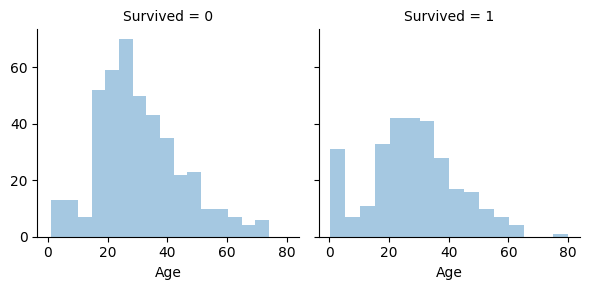

In [5]:
print(df_train['Age'].mean()) #age平均
print(df_train['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

## 方法1
* 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。  


In [8]:
#先透過 計算統計值， 分別呈現數量，年齡平均，標準差，最大值和最小值。
print(df_train['Age'].describe()) #age平均
# 透過這樣的方式，年齡最小 0.4 歲和 80 歲都在合理範圍內，所以第一關 pass。

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


## 方法 2
* 進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。  


## Z-score method

In [9]:
#http://colingorrie.github.io/outlier-detection.html
import numpy as np

# 創建一個函數，計算在這個資料中， ys:資料，times : 幾倍標準差，找出在這樣條件下的異常值。
def outliers_z_score(ys,times):
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > times)

out_index=outliers_z_score(df_train['Age'],3)
print(out_index[0])
print("用第二種方法的找出的 outlier 有哪些?")
print(df_train.loc[out_index[0],])
#  所以用這個方法，找出的 outlier 就是少數族群，年齡較大的，一位是 80 和 74。

[630 851]
用第二種方法的找出的 outlier 有哪些?
     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch  Ticket    Fare Cabin Embarked  
630  male  80.0      0      0   27042  30.000   A23        S  
851  male  74.0      0      0  347060   7.775   NaN        S  


## 異常值的判別方法3-盒鬚圖判別法(IQR method)

In [10]:
import numpy as np
# 透過一個函數來判斷是否為異常值
def outliers_iqr(ys,times):
    #注意 使用 np.percentile 要去除 nan 要不然計算出來會錯誤，所以我們採用下者的程式 np.nanpercentile
    #quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    quartile_1, quartile_3 = np.nanpercentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * times)
    upper_bound = quartile_3 + (iqr * times)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [12]:
out_index2=outliers_iqr(df_train['Age'],1.5)
print(out_index2)
print("用第三種方法的找出的 outlier 有哪些?(1.5 倍IQR)")
print(df_train.loc[out_index2[0],])

(array([ 33,  54,  96, 116, 280, 456, 493, 630, 672, 745, 851]),)
用第三種方法的找出的 outlier 有哪些?(1.5 倍IQR)
     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, M

In [90]:
out_index3=outliers_iqr(df_train['Age'],2)
print(out_index3)
print("用第三種方法的找出的 outlier 有哪些?(2 倍IQR)")
print(df_train.loc[out_index3[0],'Age'])

(array([630, 851], dtype=int64),)
用第三種方法的找出的 outlier 有哪些?(2 倍IQR)
630    80.0
851    74.0
Name: Age, dtype: float64


## 畫盒鬚圖
方法：利用matplotlib包中axes物件的boxplot()方法。，
透過 whis 來設定 IQR 的倍數

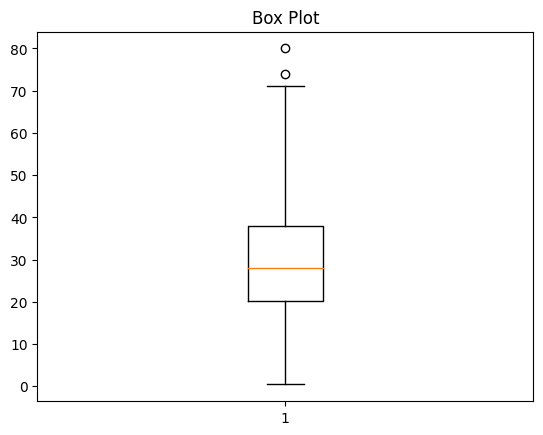

In [13]:
# 使用np.isnana(data)，找出在 age中的遺失值，然後逐位反轉，讓遺失值為 0,則可以透過索引的方式，濾掉遺失值。
plt.boxplot(df_train['Age'][~np.isnan(df_train['Age'])],whis=2)    #作圖
plt.title('Box Plot')
plt.show()

## 但在用任何方法後，都需要做判斷，這是 outlier 嗎?
* 需有業務面的資訊可以輔助你回答這問題，   
在鐵達尼案例中，年紀的似乎沒有 outlier，
但有時候 outlier 判斷無法從單一變數檢視出來，
假如 80.0 的這個人，但是在姓名中，發現她可能是個小孩，那 80 歲的年紀，就有可能是 outlier。